# Segmentation Understanding

This script is designed to analyze and visualize key differentiators across segments in survey data, originally intended for presentation in an Excel workbook. The analysis provides insights into how different segments vary based on both categorical and continuous variables, helping researchers to better understand the unique characteristics of each segment and how they relate to each other.

## Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '/Users/adrianacuppuleri/Library/Mobile Documents/com~apple~CloudDocs/GITHUB ADRIANA/conjoint_analysis/ExerciseAdriana/part1_data.csv'
datamap_path = '/Users/adrianacuppuleri/Library/Mobile Documents/com~apple~CloudDocs/GITHUB ADRIANA/conjoint_analysis/ExerciseAdriana/part1_datamap.csv'

In [3]:
datamap = pd.read_csv(datamap_path)
data = pd.read_csv(data_path)

In [4]:
print("Data Map Preview:")
print(datamap.head())

Data Map Preview:
  Question ID Sub Question ID        Question Display       Question Type  \
0         CID             CID  Internal Respondent Id  Open text response   
1         S01             S01    What is your gender?              Values   
2         S01             S01    What is your gender?              Values   
3         S01             S01    What is your gender?              Values   
4         S01             S01    What is your gender?              Values   

   Value ID            Value Text Sub Question Text  
0       NaN                   NaN               NaN  
1       1.0                Female               NaN  
2       2.0                  Male               NaN  
3       3.0                 Other               NaN  
4      98.0  Prefer not to answer               NaN  


In [5]:
print("\nMain Data Preview:")
print(data.head())


Main Data Preview:
         CID  Segment  MDScores_M01_1  MDScores_M01_2  MDScores_M01_3  \
0  672371701       22         0.18551         6.56302         0.60897   
1  672371709       21         3.02223         8.80587         6.33921   
2  672371721       17         0.76480         4.67550         1.81022   
3  672371753       17         0.40041        10.33985         6.07727   
4  672371754       10         1.21412        13.86520         5.78259   

   MDScores_M01_4  MDScores_M01_5  MDScores_M01_6  MDScores_M01_7  \
0         1.10627         9.32762        14.72984         0.93471   
1        15.10408         2.77632         6.37761         3.85486   
2         6.18085        10.44179        10.79138         1.75908   
3         2.14910         5.20120         4.25500         2.96840   
4         3.08326         2.01262         5.99286         2.00611   

   MDScores_M01_8  ...  S09_59  S09_999  S10  P02  P04a  P04b  P18a  P18b  \
0         2.05895  ...     NaN        0   44  404

## Variable Classification

In [6]:
#Map column types using 'Question ID' and 'Question Type' from datamap
type_mapping = datamap[['Question ID', 'Question Type']].drop_duplicates().set_index('Question ID').to_dict()['Question Type']
type_mapping

{'CID': 'Open text response',
 'S01': 'Values',
 'S02': 'Open numeric response',
 'S03a': 'Values',
 'S20': 'Values',
 'S04b': 'Values',
 'S05a': 'Values',
 'S06': 'Values',
 'S07': 'Values',
 'S08': 'Values',
 'S09': 'Values',
 'S10': 'Values',
 'P02': 'Values',
 'P04a': 'Values',
 'P04b': 'Values',
 'P05a': 'Values',
 'P06': 'Values',
 'P18a': 'Values',
 'P18b': 'Values',
 'MDScores_M01': 'Open numeric response',
 'MDScores_M02': 'Open numeric response',
 'Segment': 'Values'}

In [7]:
#Separate columns in the main data file based on type mapping
continuous_columns = [col for col in data.columns if type_mapping.get(col.split('_')[0], '') == 'Open numeric response']
categorical_columns = [col for col in data.columns if type_mapping.get(col.split('_')[0], '') == 'Values']
text_columns = [col for col in data.columns if type_mapping.get(col.split('_')[0], '') == 'Open text response']

In [8]:
print("Continuous Columns:", continuous_columns)
print("Categorical Columns:", categorical_columns)
print("Text Columns:", text_columns)

Continuous Columns: ['S02_1']
Categorical Columns: ['Segment', 'S01', 'S03a', 'S20', 'S04b_11', 'S04b_12', 'S04b_1', 'S04b_2', 'S04b_3', 'S04b_4', 'S04b_5', 'S04b_6', 'S04b_7', 'S04b_8', 'S04b_9', 'S04b_10', 'S05a_11', 'S05a_12', 'S05a_1', 'S05a_2', 'S05a_3', 'S05a_4', 'S05a_5', 'S05a_6', 'S05a_7', 'S05a_8', 'S05a_9', 'S05a_10', 'S06_1', 'S06_2', 'S06_3', 'S06_4', 'S06_5', 'S06_6', 'S06_7', 'S06_8', 'S06_9', 'S06_10', 'S06_11', 'S06_12', 'S06_13', 'S06_14', 'S06_15', 'S06_16', 'S06_17', 'S06_18', 'S06_19', 'S06_20', 'S06_21', 'S06_22', 'S06_23', 'S06_24', 'S06_25', 'S06_26', 'S06_27', 'S06_28', 'S06_29', 'S06_30', 'S06_31', 'S06_32', 'S06_33', 'S06_34', 'S06_35', 'S06_36', 'S06_37', 'S06_38', 'S06_39', 'S06_40', 'S06_41', 'S06_42', 'S06_43', 'S06_44', 'S06_45', 'S06_46', 'S06_47', 'S06_48', 'S06_49', 'S06_50', 'S06_51', 'S06_52', 'S06_53', 'S06_54', 'S06_55', 'S06_56', 'S06_57', 'S06_58', 'S06_59', 'S06_999', 'S07_1', 'S07_2', 'S07_3', 'S07_4', 'S07_5', 'S07_6', 'S07_7', 'S07_8', 'S07_

## Descriptive Analysis of Segments

In [9]:
#Calculate mean for continuous variables by Segment
continuous_summary = data.groupby('Segment')[continuous_columns].mean().round(2)
continuous_summary

,S02_1
Segment,
4,30.88
5,32.14
10,30.55
11,32.17
14,55.01
17,59.93
21,60.21
22,56.37


In [10]:
#Calculate percentage for categorical variables by Segment
categorical_summary_dfs = []

for col in categorical_columns:
    
    if col != 'Segment':
        summary = data.groupby('Segment')[col].value_counts(normalize=True).unstack(fill_value=0)
        summary = summary.round(2)
        summary.columns = [f"{col}_{val}" for val in summary.columns]  # Rename columns to include the original column name
        categorical_summary_dfs.append(summary)

In [11]:
# Concatenate all categorical summaries into a single DataFrame
categorical_summary_df = pd.concat(categorical_summary_dfs, axis=1)

In [12]:
print("\nImproved Categorical Summary by Segment:")
#proportion of each category within each segment
categorical_summary_df.head()


Improved Categorical Summary by Segment:


,S01_1,S01_2,S01_3,S03a_1,S03a_2,S03a_3,S03a_4,S03a_5,S03a_6,S03a_7,...,P05a_1.0,P05a_2.0,P05a_3.0,P05a_4.0,P05a_5.0,P05a_6.0,P05a_97.0,P06_1.0,P06_2.0,P06_3.0
Segment,,,,,,,,,,,,,,,,,,,,,
4,0.54,0.44,0.02,0.11,0.11,0.04,0.04,0.01,0.03,0.09,...,0.15,0.48,0.12,0.10,0.02,0.10,0.02,0.59,0.22,0.19
5,0.58,0.42,0.00,0.18,0.16,0.04,0.03,0.00,0.02,0.06,...,0.27,0.44,0.10,0.08,0.02,0.09,0.00,0.63,0.17,0.20
10,0.52,0.47,0.00,0.14,0.15,0.08,0.02,0.01,0.04,0.08,...,0.22,0.44,0.07,0.15,0.06,0.06,0.00,0.56,0.35,0.09
11,0.54,0.46,0.00,0.11,0.13,0.04,0.02,0.01,0.04,0.05,...,0.26,0.47,0.04,0.11,0.04,0.08,0.00,0.61,0.26,0.13
14,0.52,0.48,0.00,0.15,0.10,0.06,0.05,0.01,0.02,0.07,...,0.43,0.47,0.04,0.00,0.02,0.02,0.02,0.54,0.20,0.26


save crosstab as csv

In [13]:
#segment comparison
cross_tab = pd.concat([continuous_summary, categorical_summary_df], axis=1)

In [14]:
cross_tab

,S02_1,S01_1,S01_2,S01_3,S03a_1,S03a_2,S03a_3,S03a_4,S03a_5,S03a_6,...,P05a_1.0,P05a_2.0,P05a_3.0,P05a_4.0,P05a_5.0,P05a_6.0,P05a_97.0,P06_1.0,P06_2.0,P06_3.0
Segment,,,,,,,,,,,,,,,,,,,,,
4,30.88,0.54,0.44,0.02,0.11,0.11,0.04,0.04,0.01,0.03,...,0.15,0.48,0.12,0.10,0.02,0.10,0.02,0.59,0.22,0.19
5,32.14,0.58,0.42,0.00,0.18,0.16,0.04,0.03,0.00,0.02,...,0.27,0.44,0.10,0.08,0.02,0.09,0.00,0.63,0.17,0.20
10,30.55,0.52,0.47,0.00,0.14,0.15,0.08,0.02,0.01,0.04,...,0.22,0.44,0.07,0.15,0.06,0.06,0.00,0.56,0.35,0.09
11,32.17,0.54,0.46,0.00,0.11,0.13,0.04,0.02,0.01,0.04,...,0.26,0.47,0.04,0.11,0.04,0.08,0.00,0.61,0.26,0.13
14,55.01,0.52,0.48,0.00,0.15,0.10,0.06,0.05,0.01,0.02,...,0.43,0.47,0.04,0.00,0.02,0.02,0.02,0.54,0.20,0.26
17,59.93,0.52,0.48,0.00,0.12,0.18,0.04,0.04,0.01,0.02,...,0.18,0.65,0.02,0.08,0.01,0.05,0.01,0.58,0.18,0.24
21,60.21,0.59,0.41,0.00,0.11,0.12,0.02,0.04,0.00,0.04,...,0.21,0.62,0.01,0.06,0.00,0.09,0.01,0.61,0.18,0.21
22,56.37,0.40,0.59,0.01,0.15,0.14,0.02,0.04,0.01,0.02,...,0.26,0.58,0.03,0.05,0.03,0.03,0.00,0.59,0.27,0.14


In [15]:
cross_tab_pivot = cross_tab.T

In [16]:
#save as c
cross_tab_pivot.to_csv('cross_tab_part1.csv')

## Identification of Key Differentiators

In [39]:
## Calculate Differences in Continuous Variables
continuous_diffs = continuous_summary.agg(['max', 'min'])
continuous_diffs.loc['range'] = continuous_diffs.loc['max'] - continuous_diffs.loc['min']
continuous_diffs

,S02_1
max,60.21
min,30.55
range,29.66


In [40]:
# Calculate max, min, and range for each category within categorical variables
categorical_diffs = categorical_summary_df.agg(['max', 'min'])
categorical_diffs.loc['range'] = categorical_diffs.loc['max'] - categorical_diffs.loc['min']

# Display the results to highlight differences in categorical distributions across segments
print("Differences in Categorical Variables (Max, Min, Range):")
print(categorical_diffs)
#understand overall variability across segments and identify which categories have significant spread

Differences in Categorical Variables (Max, Min, Range):
       S01_1  S01_2  S01_3  S03a_1  S03a_2  S03a_3  S03a_4  S03a_5  S03a_6  \
max     0.59   0.59   0.02    0.18    0.18    0.08    0.05    0.01    0.04   
min     0.40   0.41   0.00    0.11    0.10    0.02    0.02    0.00    0.02   
range   0.19   0.18   0.02    0.07    0.08    0.06    0.03    0.01    0.02   

       S03a_7  ...  P05a_1.0  P05a_2.0  P05a_3.0  P05a_4.0  P05a_5.0  \
max      0.09  ...      0.43      0.65      0.12      0.15      0.06   
min      0.05  ...      0.15      0.44      0.01      0.00      0.00   
range    0.04  ...      0.28      0.21      0.11      0.15      0.06   

       P05a_6.0  P05a_97.0  P06_1.0  P06_2.0  P06_3.0  
max        0.10       0.02     0.63     0.35     0.26  
min        0.02       0.00     0.54     0.17     0.09  
range      0.08       0.02     0.09     0.18     0.17  

[3 rows x 739 columns]


In [45]:
#key diff with high percentage

threshold = 0.5
key_differentiators = categorical_summary_df[categorical_summary_df > threshold]

#  Drop columns where all values are NaN (meaning no segment met the threshold for that category)
key_differentiators = key_differentiators.dropna(axis=1, how='all')

# Fill remaining NaNs with "Below Threshold" for readability
key_differentiators_filled = key_differentiators.fillna("Below Threshold")

# Display the final result
print("Key Differentiators with High Percentages by Segment (NaNs Filled):")
print(key_differentiators_filled)

Key Differentiators with High Percentages by Segment (NaNs Filled):
                   S01_1            S01_2  S04b_11_1  S04b_12_1  \
Segment                                                           
4                   0.54  Below Threshold       0.61       0.84   
5                   0.58  Below Threshold       0.56       0.79   
10                  0.52  Below Threshold       0.59       0.70   
11                  0.54  Below Threshold       0.61       0.77   
14                  0.52  Below Threshold       0.52       0.63   
17                  0.52  Below Threshold       0.61       0.70   
21                  0.59  Below Threshold       0.62       0.68   
22       Below Threshold             0.59       0.67       0.70   

                S04b_1_7  S04b_4_1  S04b_7_1         S04b_8_1  S04b_10_1  \
Segment                                                                    
4        Below Threshold      0.55      0.67             0.65       0.88   
5        Below Threshold      0.6

In [46]:
#Calculate the maximum percentage for each category across segments
top_differentiators = key_differentiators_filled.max().sort_values(ascending=False).head(10).index

/var/folders/mm/gw92vpys6rggjz_4z42s244w0000gn/T/ipykernel_10471/3974475420.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top_differentiators = key_differentiators_filled.max().sort_values(ascending=False).head(10).index


In [47]:
#Select only the top 10 differentiators from the key_differentiators_filled DataFrame
top_differentiators_df = key_differentiators[top_differentiators]

In [48]:
top_differentiators_df

,S08_999_0,S07_999_0,S06_999_0,S09_999_0,S06_9_0.0,S05a_4_1.0,P04a_1,S06_1_0,S05a_10_1.0,S05a_7_1.0
Segment,,,,,,,,,,
4,1.0,1.0,1.0,1.0,0.94,0.90,0.96,0.77,0.83,0.68
5,1.0,1.0,1.0,1.0,0.95,0.87,0.95,0.76,0.86,0.74
10,1.0,1.0,1.0,1.0,0.86,0.85,0.85,0.74,0.83,0.84
11,1.0,1.0,1.0,1.0,0.92,0.85,0.86,0.81,0.89,0.83
14,1.0,1.0,1.0,1.0,0.96,0.72,0.91,0.91,0.92,0.92
17,1.0,1.0,1.0,1.0,0.98,0.98,0.96,0.96,0.91,0.83
21,1.0,1.0,1.0,1.0,0.99,0.93,0.97,0.94,0.96,0.87
22,1.0,1.0,1.0,1.0,0.93,0.91,0.83,0.92,0.92,0.92


In [50]:
top_differentiators_df.to_csv('top_key_differentiators')

##  Visualisations

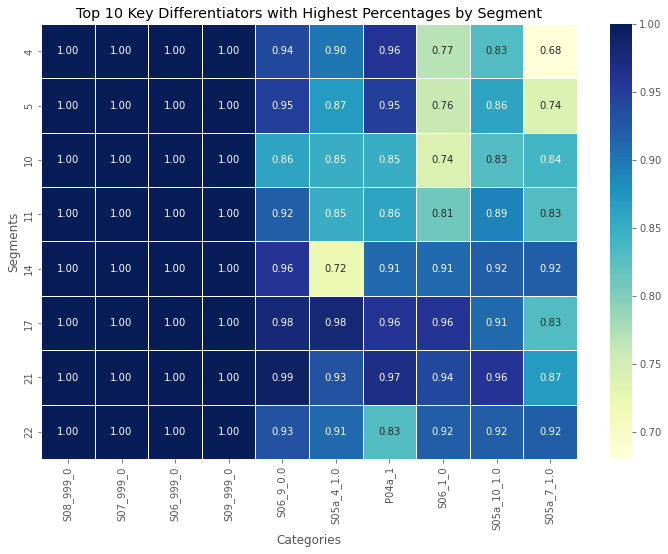

In [49]:
#Visualize the top 10 differentiators using a heatmap to show the high percentages by segment for these top differentiators
plt.figure(figsize=(12, 8))
sns.heatmap(top_differentiators_df, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Top 10 Key Differentiators with Highest Percentages by Segment")
plt.xlabel("Categories")
plt.ylabel("Segments")
plt.show()

In [17]:
# Load the combined summary data
cross_tab_pivot = pd.read_csv('cross_tab_part1.csv')

# Set up plotting aesthetics
plt.style.use('ggplot')

In [18]:
cross_tab_pivot.head()

,Unnamed: 0,4,5,10,11,14,17,21,22
0,S02_1,30.88,32.14,30.55,32.17,55.01,59.93,60.21,56.37
1,S01_1,0.54,0.58,0.52,0.54,0.52,0.52,0.59,0.40
2,S01_2,0.44,0.42,0.47,0.46,0.48,0.48,0.41,0.59
3,S01_3,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01
4,S03a_1,0.11,0.18,0.14,0.11,0.15,0.12,0.11,0.15


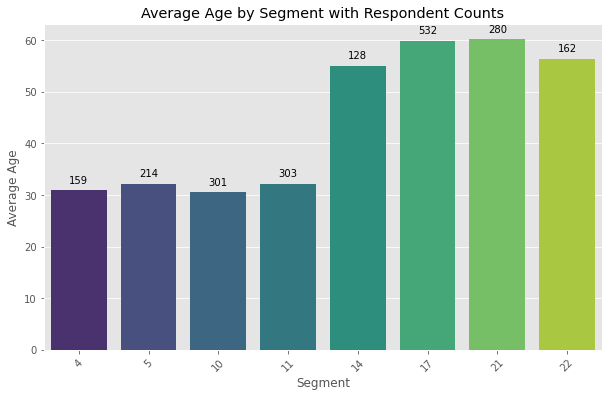

In [19]:
segment_counts = data.groupby('Segment').size()  # Count of respondents per segment

# Bar plot for average age by segment (assuming S02_1 is age)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cross_tab.index, y=cross_tab['S02_1'], palette="viridis")

# Add the count of respondents on top of each bar
for index, (value, count) in enumerate(zip(cross_tab['S02_1'], segment_counts)):
    ax.text(index, value + 1, f"{count}", ha='center', va='bottom')  # Adjust position as needed

plt.title('Average Age by Segment with Respondent Counts')
plt.xlabel('Segment')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

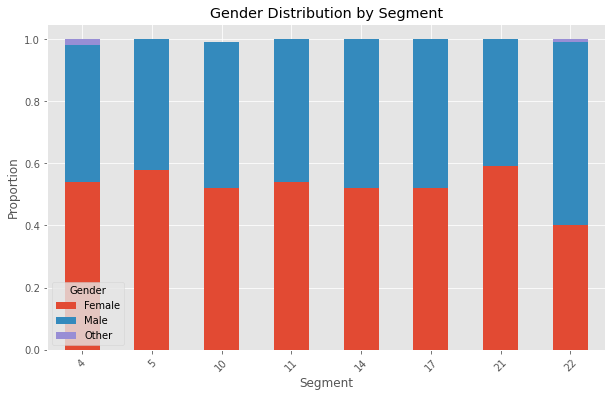

In [20]:
# Identify gender-related columns based on the mapping from the datamap
gender_columns = ['S01_1', 'S01_2', 'S01_3'] # 'S01_98' not in dataset
gender_labels = ['Female', 'Male', 'Other']

# Plot a stacked bar chart for gender distribution by segment
cross_tab[gender_columns].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Proportion')
plt.legend(gender_labels, title='Gender')
plt.xticks(rotation=45)
plt.show()

In [21]:
region_columns = [f'S03a_{i}' for i in range(1, 17)]
region_labels = [
    'Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen', 
    'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen', 
    'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen', 
    'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'
]

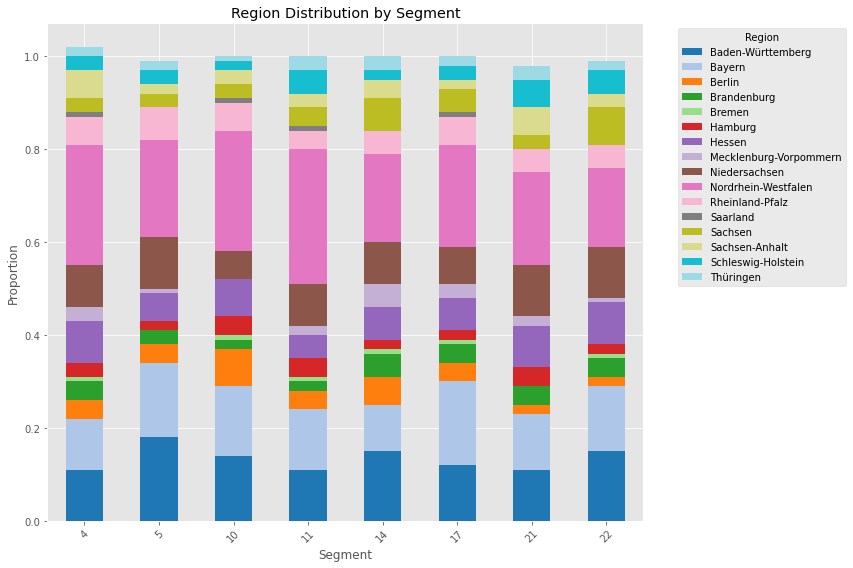

In [22]:
# Plot a stacked bar chart for region distribution by segment
cross_tab[region_columns].plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Region Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Proportion')
plt.legend(region_labels, title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
income_columns = ['S20_1', 'S20_2', 'S20_3', 'S20_4', 'S20_5', 'S20_6', 'S20_7', 'S20_98']
income_labels = [
    '< 24,000 €', '24,000 € - 32,999 €', '33,000 € - 41,999 €', '42,000 € - 76,999 €',
    '77,000 € - 99,999 €', '100,000 € - 149,999 €', '150,000 € >=', 'Prefer not to answer'
]

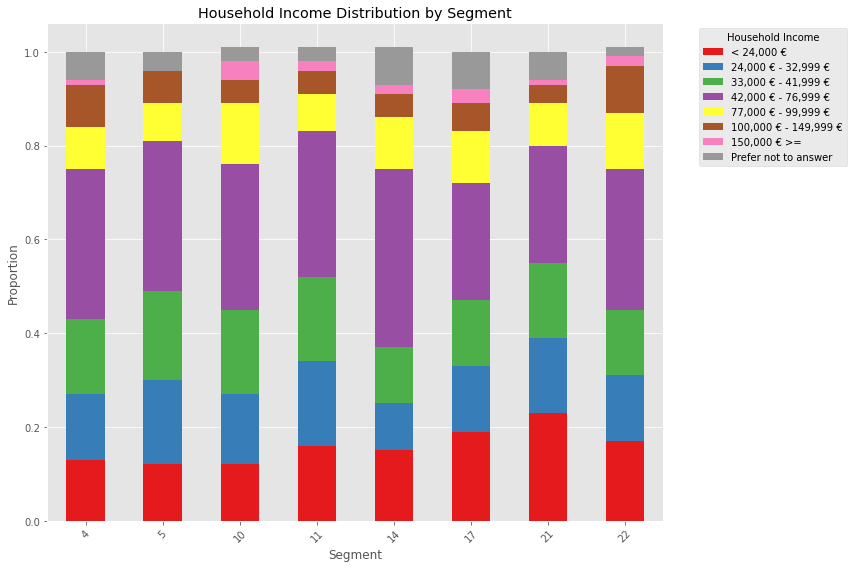

In [24]:
cross_tab[income_columns].plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set1')
plt.title('Household Income Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Proportion')
plt.legend(income_labels, title='Household Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()